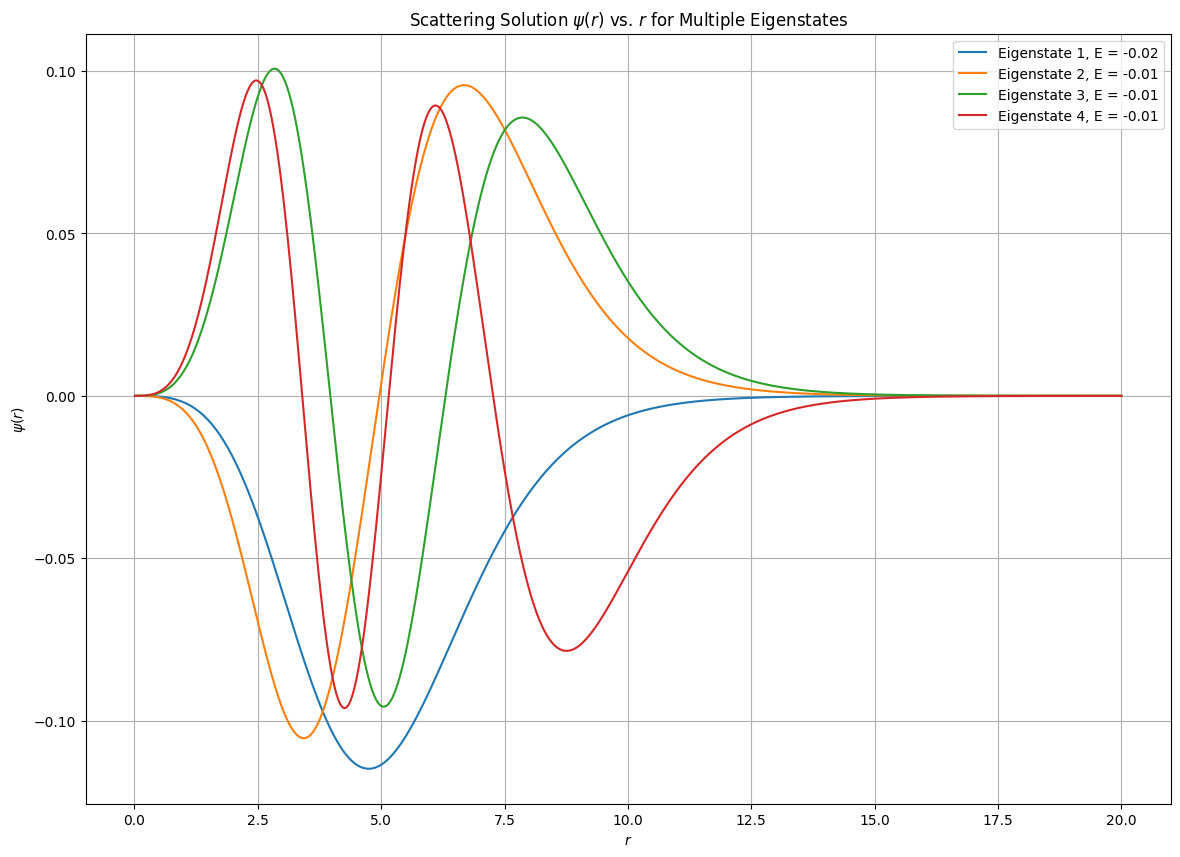

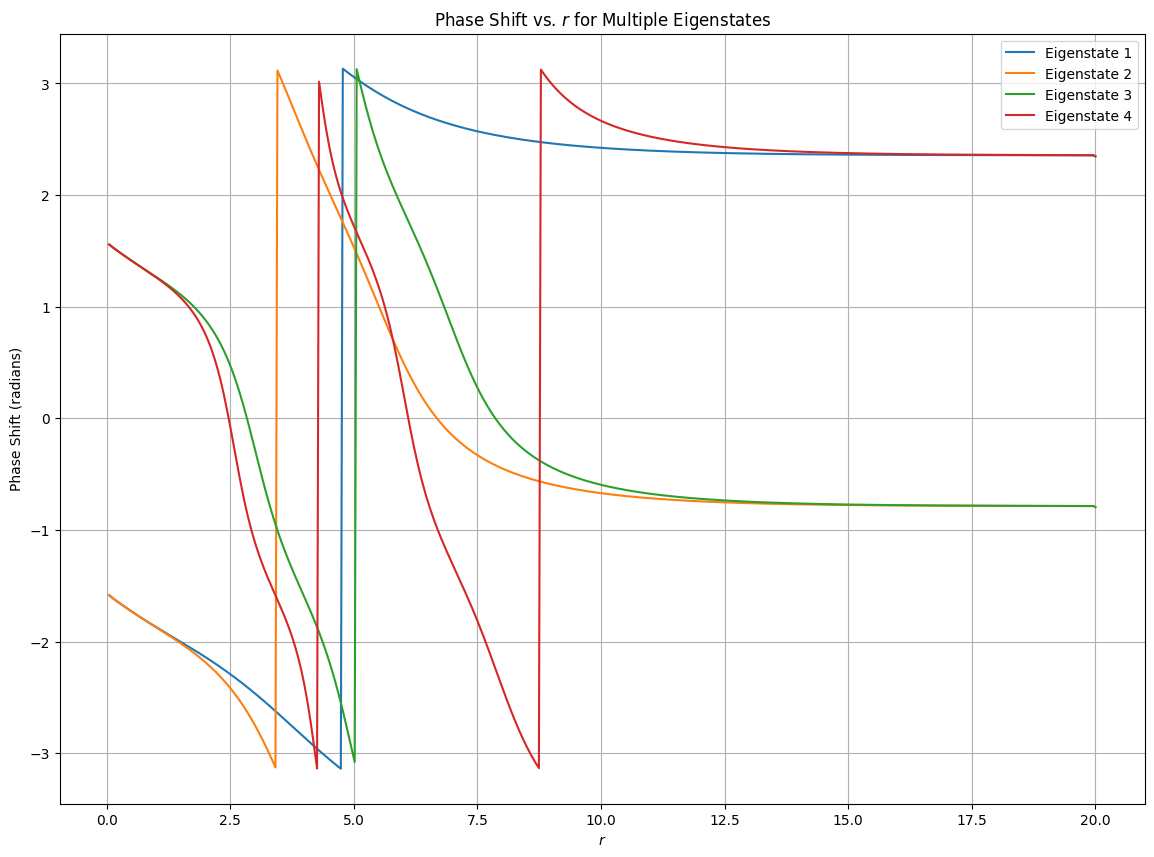

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from scipy.integrate import simps

# Define the potential function
def V(r, V_0, mu):
    return V_0 * np.exp(-mu * r) / r

# Define the Green's function for scattering
def G0(r, r_prime, k):
    return np.exp(-k * np.abs(r - r_prime)) / (4 * np.pi)

# Discretization parameters
r_min = 0.01
r_max = 20.0
num_points = 500
r = np.linspace(r_min, r_max, num_points)
dr = r[1] - r[0]

# Parameters for the potential
V_0 = -1.0
mu = 0.7
k = 1.0  # Wave number (example)

# Construct the potential matrix
V_matrix = np.diag(V(r, V_0, mu) * r**2 * dr)

# Construct the Green's function matrix
G_matrix = np.zeros((num_points, num_points))
for i in range(num_points):
    for j in range(num_points):
        G_matrix[i, j] = G0(r[i], r[j], k) * r[j]**2 * dr

# Integral kernel matrix K
K_matrix = np.dot(G_matrix, V_matrix)

# Solve the eigenvalue problem
eigvals, eigvecs = eigh(K_matrix)
eigenvalue_indices = np.argsort(np.real(eigvals))
eigenvalues = np.real(eigvals[eigenvalue_indices])
eigenvectors = np.real(eigvecs[:, eigenvalue_indices])

# Plot the first few eigenfunctions (corresponding to the lowest eigenstates)
num_plot_states = 4  # Number of eigenstates to plot
plt.figure(figsize=(14, 10))

for i in range(num_plot_states):
    psi = eigenvectors[:, i]
    plt.plot(r, psi, label=f'Eigenstate {i+1}, E = {eigenvalues[i]:.2f}')

plt.xlabel('$r$')
plt.ylabel('$\psi(r)$')
plt.title('Scattering Solution $\psi(r)$ vs. $r$ for Multiple Eigenstates')
plt.legend()
plt.grid()
plt.show()

# Analyze the phase shift
def compute_phase_shift(psi, r, k):
    r_mid = (r[:-1] + r[1:]) / 2
    dr = r[1] - r[0]
    psi_mid = (psi[:-1] + psi[1:]) / 2
    dpsi_dr = np.gradient(psi, r)

    # Asymptotic form for large r
    phase_shift = np.arctan2(dpsi_dr, psi)

    return phase_shift

# Compute and plot phase shifts for all eigenstates
plt.figure(figsize=(14, 10))

for i in range(num_plot_states):
    psi = eigenvectors[:, i]
    phase_shift = compute_phase_shift(psi, r, k)
    plt.plot(r[1:], phase_shift[1:], label=f'Eigenstate {i+1}')

plt.xlabel('$r$')
plt.ylabel('Phase Shift (radians)')
plt.title('Phase Shift vs. $r$ for Multiple Eigenstates')
plt.legend()
plt.grid()
plt.show()
